In [3]:
library(readr)
library(dplyr)
library(ggplot2)


# Loading Exoplanet Data
pl_data <- read_csv("NASA_pl.csv", n_max = 500, skip = 96)

Parsed with column specification:
cols(
  .default = col_double(),
  pl_name = col_character(),
  hostname = col_character(),
  discoverymethod = col_character(),
  disc_facility = col_character(),
  soltype = col_character(),
  pl_refname = col_character(),
  pl_bmassprov = col_character(),
  st_refname = col_character(),
  st_spectype = col_character(),
  st_metratio = col_character(),
  sy_refname = col_character(),
  rastr = col_character(),
  decstr = col_character(),
  rowupdate = col_date(format = ""),
  pl_pubdate = col_character(),
  releasedate = col_date(format = "")
)
See spec(...) for full column specifications.


In [4]:
# Selecting Columns
pl_data_clean_1 <- pl_data %>%
  select(pl_name, hostname, discoverymethod, disc_year, disc_facility, pl_bmassj)

In [6]:
# Discovery Plot
pl_exo <- ggplot(pl_data_clean_1, aes(x =disc_year, pl_bmassj, color = discoverymethod)) +
      geom_point(position = "jitter", alpha = 0.5, size = 2) +
      scale_y_log10() +
      ggtitle("Planet discovered by mass over years") +
      labs(color = "Discovery Method") +
      xlab("Discovery Year") +
      ylab("Planet Mass")

Warning message:
“Removed 119 rows containing missing values (geom_point).”

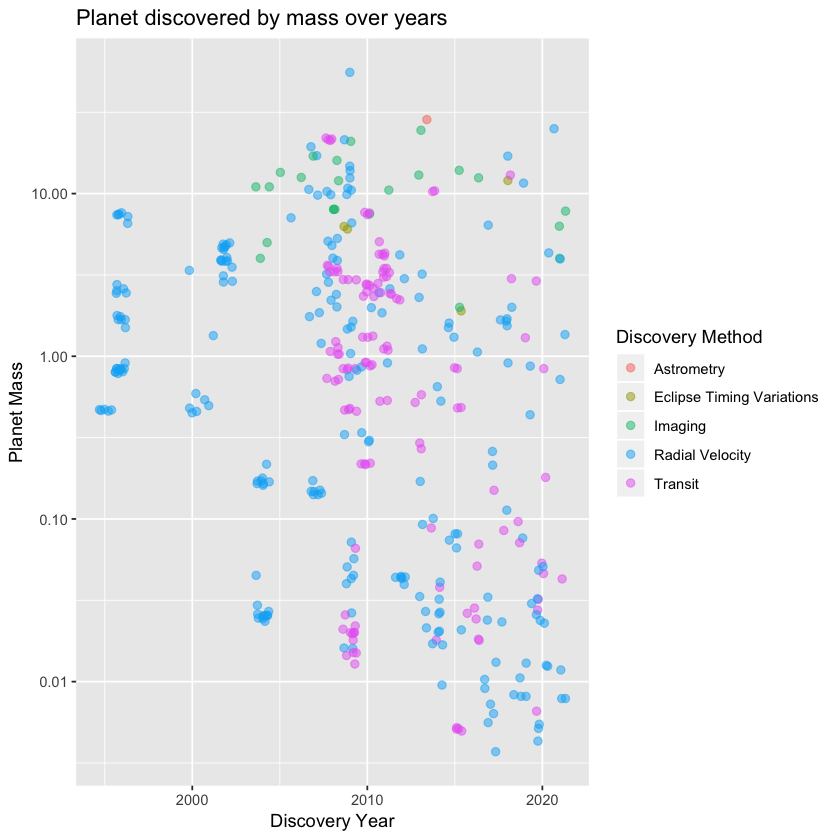

In [9]:
pl_exo

In [10]:
# Facility plot  
fl_exo <- ggplot(pl_data_clean_1, aes(disc_facility, fill = disc_facility)) + geom_bar()

fl_exo_plot <- fl_exo + coord_flip() + theme_bw() + labs(title = "Number of Exoplanets Discovered by Facility", x = "Facility", y = "Count") + theme(legend.position = "none")

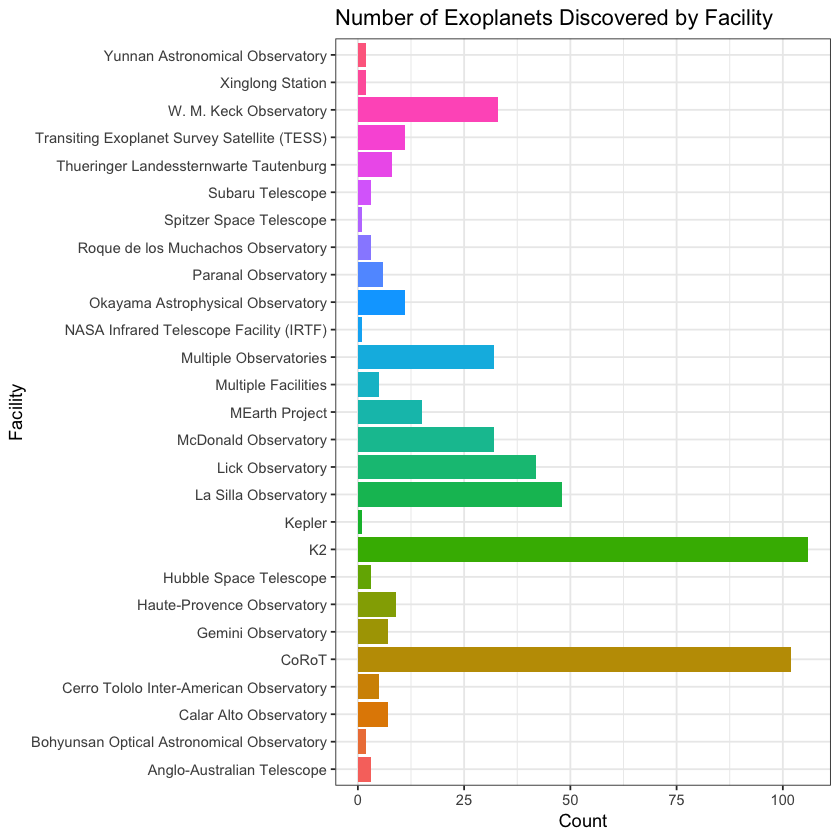

In [11]:
fl_exo_plot

In [13]:
# Counting by mass greater than 10
pl_data_clean_2 <- pl_data_clean_1 %>%
  filter(pl_bmassj > 10.00)

count_mass <- count(pl_data_clean_2, pl_bmassj, sort = TRUE)

Warning message:
“Ignoring unknown parameters: bandwidth”Warning message:
“Removed 119 rows containing non-finite values (stat_density).”Warning message:
“Groups with fewer than two data points have been dropped.”

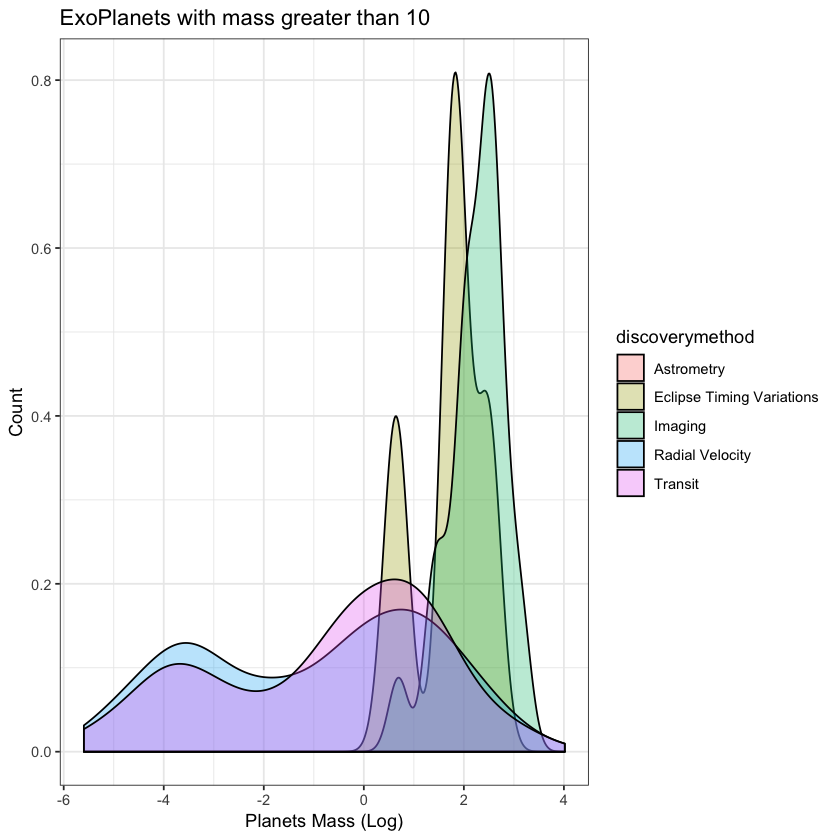

In [14]:
# Greater than 10 plot
ggplot(pl_data_clean_1, aes(log(pl_bmassj), fill = discoverymethod)) +
  geom_density(alpha = 0.3, bandwidth = 5) +
  theme_bw() +
  ggtitle("ExoPlanets with mass greater than 10") +
  labs(color = "Discovery Method") +
  xlab("Planets Mass (Log)") +
  ylab("Count")